# JSON-stat til Pandas dataframe - funksjon

In [ ]:
import json
import pandas as pd
import requests
# pyjstat er biblioteket for å lese JSON-stat, 'pip install pyjstat' 
from pyjstat import pyjstat

## Alternativ 1, lim inn POST Url og JSON-spørring

In [ ]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/07459/"
# f.eks. 
#postUrl = "https://data.ssb.no/api/v0/no/table/07459/"

In [ ]:
# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
apiQuery = # lim inn spørringen din her

# Eksempel med minimalistisk spørring. 
# Så enkel spørring er egentlig ikke anbefalt, med mindre du har forstått eliminasjon i Statistikkbanken. 

#apiQuery = {
#      "query": [
#      ],
#      "response": {
#        "format": "json-stat2"
#      }
#    }

In [ ]:
# Funksjon for å konvertere uttrekket til 2 dataframes, tar 2 paramtre

def apiToDataframe(postUrl, query):

	# postUrl som spørringen skal postes mot
	# Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

	res = requests.post(postUrl, json=query)
	# legger resultat i ds. DS har i tillegg en del metadata
	ds = pyjstat.Dataset.read(res.text)
	# skriver resultatet til to dataframes
    # først dataframe med tekst
	df = ds.write('dataframe')
    # deretter dataframe med koder
	df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
	return df, df_id, ds


Legger resultatet av apiToDataframe i tre variabler

In [ ]:
df, df_id, ds = apiToDataframe(postUrl, apiQuery)

Viser dataframe med tekst

In [ ]:
df

Dataframe med koder

In [ ]:
df_id

Hele datasettet som liste

In [ ]:
ds

In [ ]:
# Evt. Litt informasjon om pyjstat, eller hvorfor "from pyjstat import pyjstat"
# dir(pyjstat)

## Alternativ 2 
### Funksjon "jsqToTab" for å hente data via PxWebApi fra en lagret API-spørring på fil
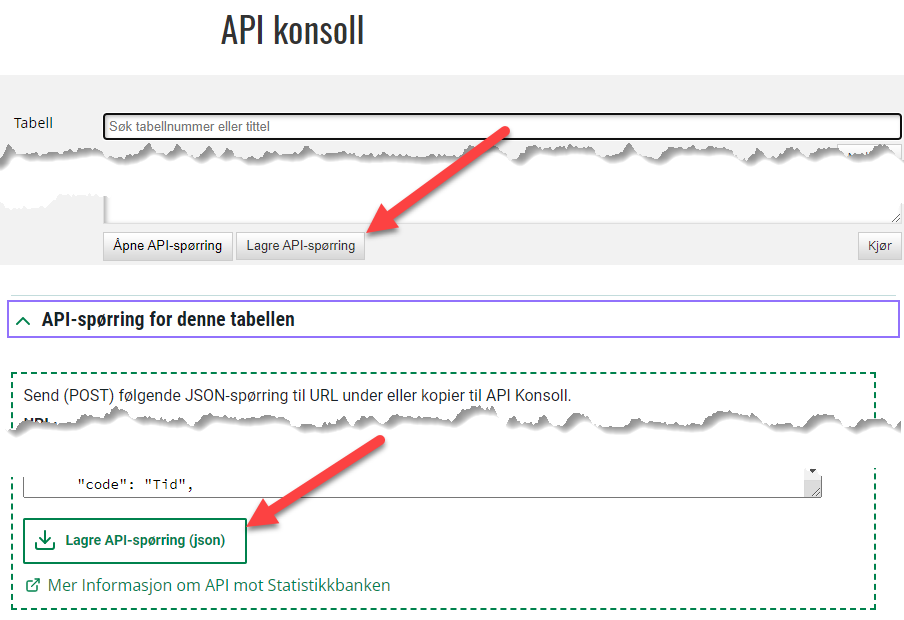

In [ ]:
import os

In [ ]:
# Funksjonen tar 1-2 paramtre
# Leser filer på formen ssbapitable_03013.json, der 03013 er ID til tabellen. 
# Eksempelet forutsetter at filen ligger i samme katalog.

# funksjon som tar id på lagret API-spørring som input
# lang kan angi språk, default er norsk
# funksjonen returnerer to dataframes, en med tekst og en med koder

def jsqToTab(qid, lang='no'):
	#
	savedApiQuery = json.load(open('ssbapi_table_' + qid + '.json'))
	# Vi finner spørringen og Tabell ID
	apiQuery = savedApiQuery['queryObj']
	tabId = savedApiQuery['tableIdForQuery']
	# PostUrl som spørringen skal postes mot
	# Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.
	postUrl = "https://data.ssb.no/api/v0/" + lang + "/table/" + tabId
	res = requests.post(postUrl, json=apiQuery)
	# legger resultat i ds
	ds = pyjstat.Dataset.read(res.text)
	# skriver resultatet til to dataframes
	df_id = ds.write('dataframe', naming='id')
	df = ds.write('dataframe')

	return df, df_id

In [ ]:
df, df_id = jsqToTab("") #sett inn 5-sifret tabellID f.eks. 03013

In [ ]:
df

In [ ]:
df_id

In [ ]:
df1, df_id1 = jsqToTab("03013", 'en') #sett inn 5 sifret tabellID 

In [ ]:
df1

df med koder er lik på norsk og engelsk

In [ ]:
df_id1